In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("../data/clean.csv")
data.shape
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,Pre-HSgrad,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,198693,Pre-HSgrad,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,27,Private,257302,Assoc,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
45218,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
45219,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
45220,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.2+ MB


Exploring Numerical Variables

In [5]:
data.select_dtypes(np.number)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
4,34,198693,6,0,0,30
...,...,...,...,...,...,...
45217,27,257302,12,0,0,38
45218,40,154374,9,0,0,40
45219,58,151910,9,0,0,40
45220,22,201490,9,0,0,20


In [6]:
num_cols = data.select_dtypes(np.number)
num_cols

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
4,34,198693,6,0,0,30
...,...,...,...,...,...,...
45217,27,257302,12,0,0,38
45218,40,154374,9,0,0,40
45219,58,151910,9,0,0,40
45220,22,201490,9,0,0,20


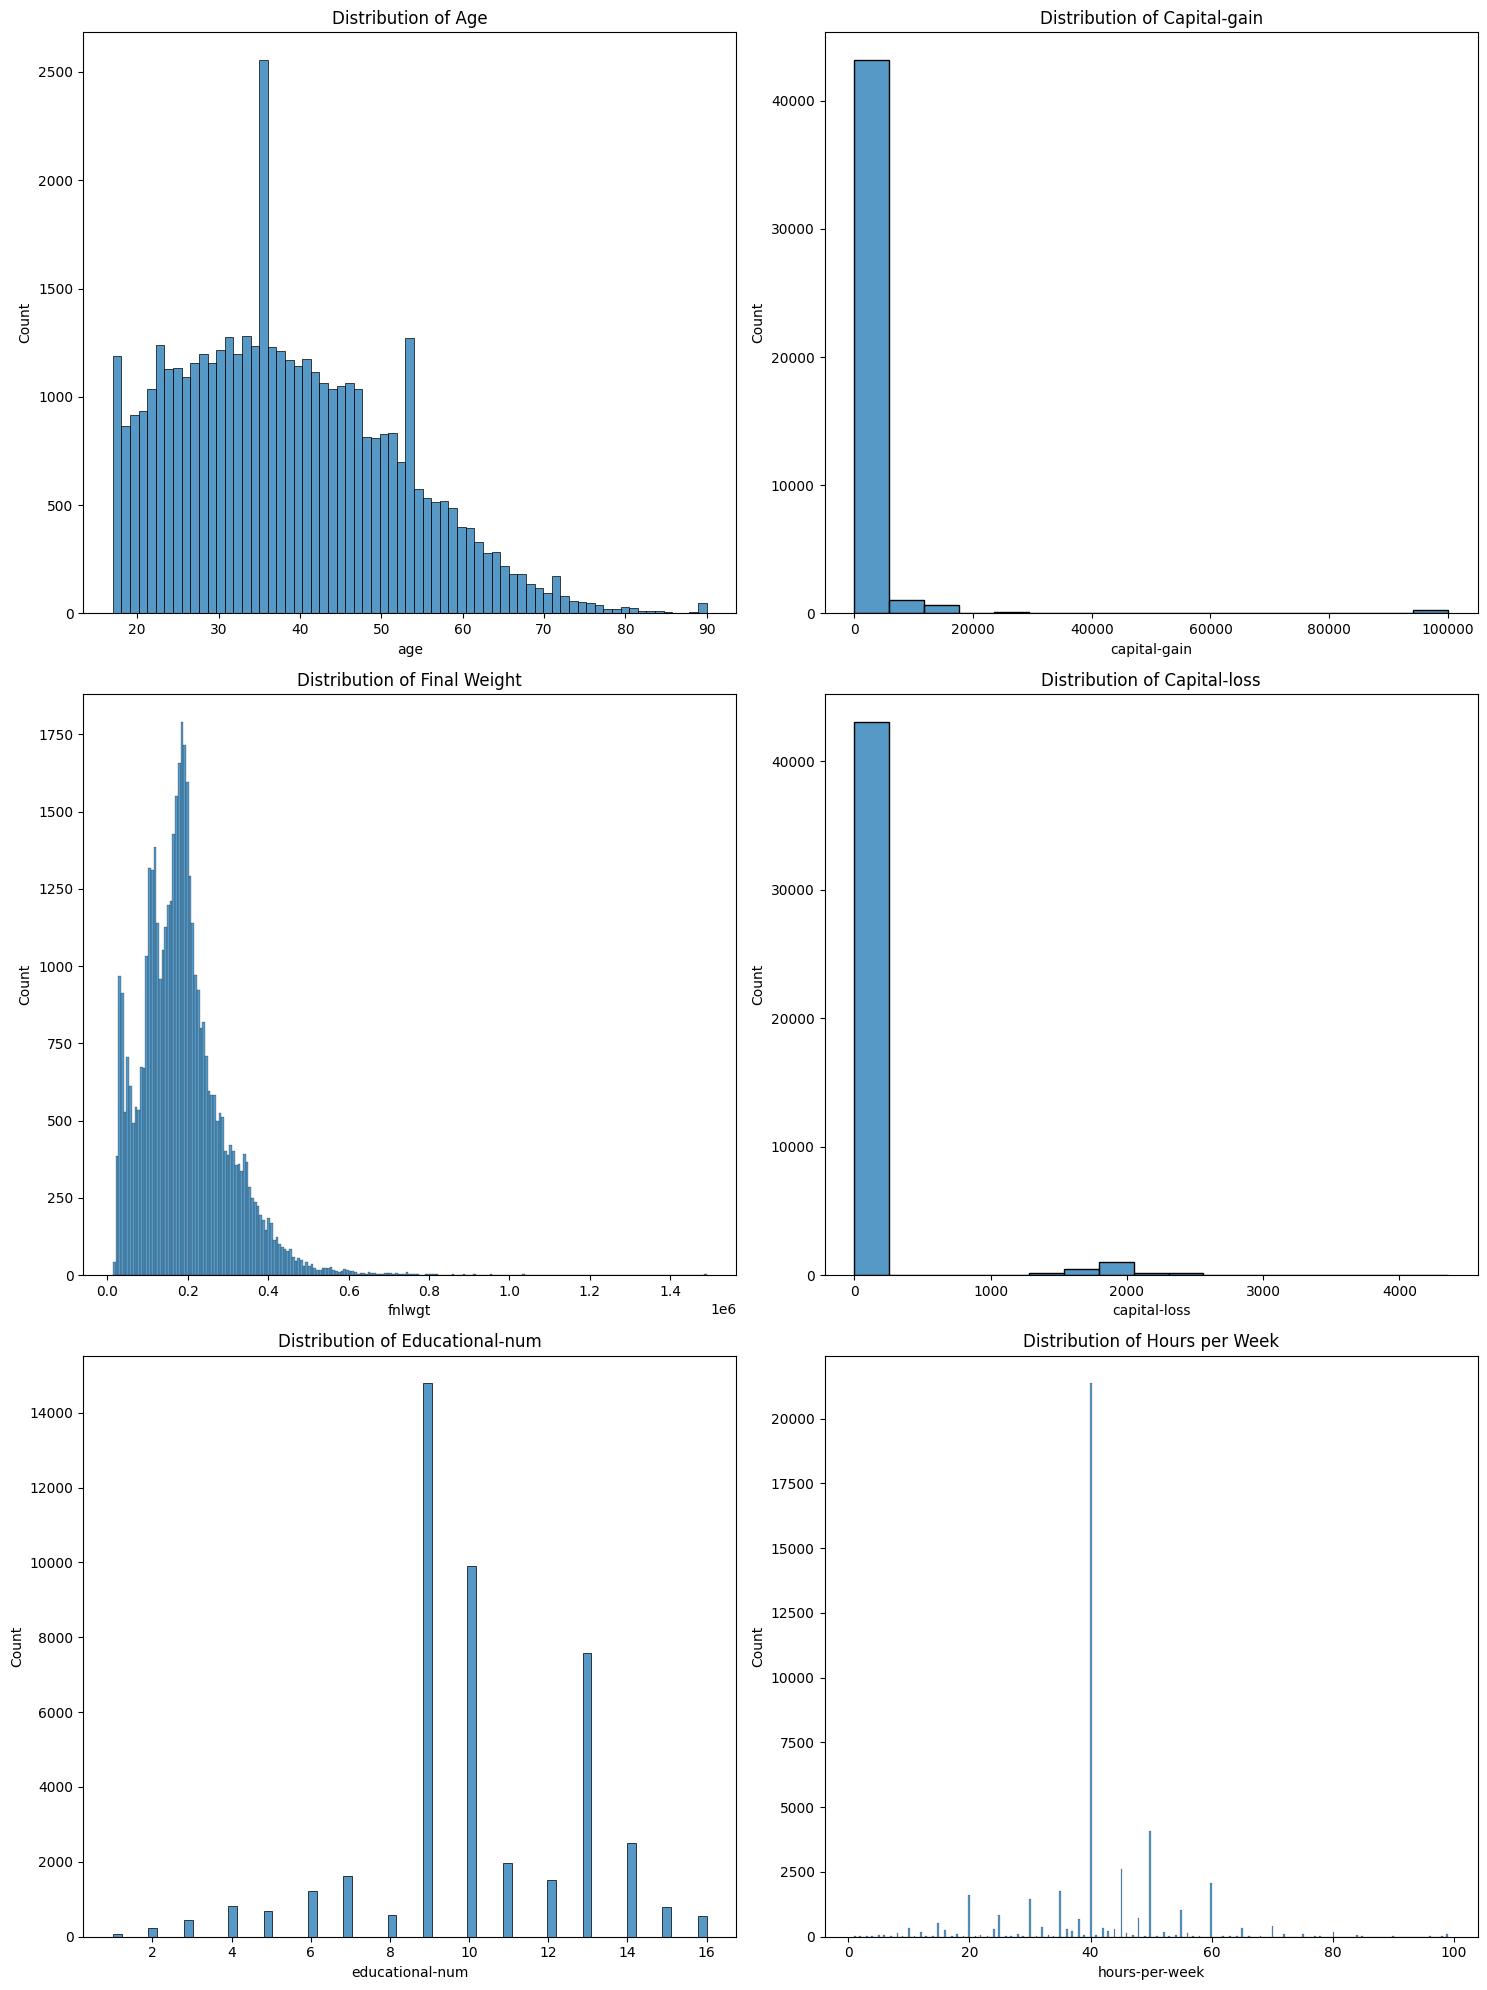

In [7]:
fig, ax = plt.subplots(3,2,figsize=(15,20))

sns.histplot(num_cols['age'],ax = ax[0,0])
ax[0,0].set_title("Distribution of Age")

sns.histplot(num_cols['fnlwgt'],ax = ax[1,0])
ax[1,0].set_title("Distribution of Final Weight")

sns.histplot(num_cols['educational-num'],ax = ax[2,0])
ax[2,0].set_title("Distribution of Educational-num")

sns.histplot(num_cols['capital-gain'],ax = ax[0,1])
ax[0,1].set_title("Distribution of Capital-gain")

sns.histplot(num_cols['capital-loss'],ax = ax[1,1])
ax[1,1].set_title("Distribution of Capital-loss")

sns.histplot(num_cols['hours-per-week'],ax = ax[2,1])
ax[2,1].set_title("Distribution of Hours per Week")

plt.tight_layout()
plt.show()

In [8]:
correlations_matrix = num_cols.corr(method='pearson')
correlations_matrix

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.075792,0.037623,0.079683,0.059351,0.101992
fnlwgt,-0.075792,1.000000,-0.041993,-0.004110,-0.004349,-0.018679
educational-num,0.037623,-0.041993,1.000000,0.126907,0.081711,0.146206
capital-gain,0.079683,-0.004110,0.126907,1.000000,-0.032102,0.083880
capital-loss,0.059351,-0.004349,0.081711,-0.032102,1.000000,0.054195
hours-per-week,0.101992,-0.018679,0.146206,0.083880,0.054195,1.000000


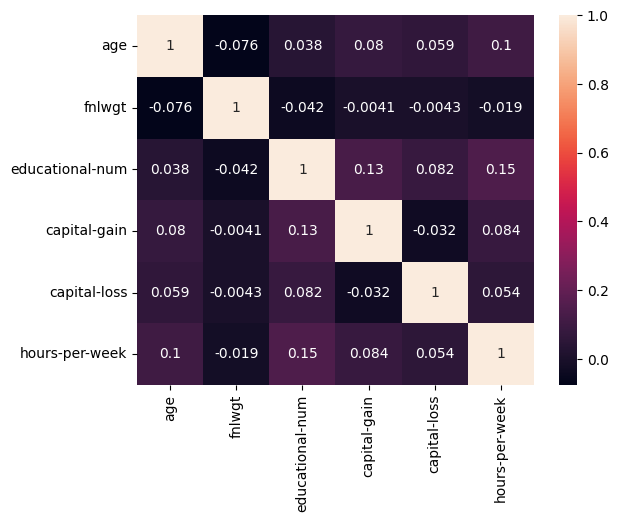

In [43]:
sns.heatmap(correlations_matrix, annot=True)
plt.show()

Exploring Categorical Variables

In [6]:
data.select_dtypes(object)

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,Pre-HSgrad,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,Private,Pre-HSgrad,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
45217,Private,Assoc,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
45218,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
45219,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
45220,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [7]:
data['education']. value_counts()

education
HS-grad         14783
Some-college     9899
Bachelors        7570
Pre-HSgrad       5661
Assoc            3466
Post-grad        3058
Prof-school       785
Name: count, dtype: int64

In [8]:
education_counts = data['education'].value_counts()

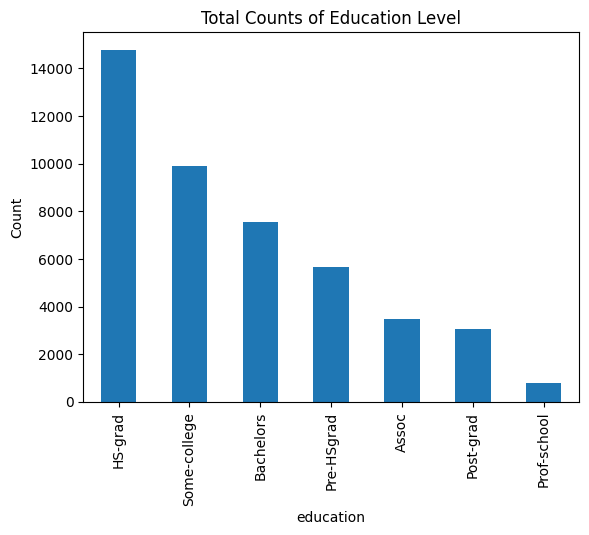

In [9]:
education_counts.plot(kind='bar', stacked=True)
plt.xlabel('education')
plt.ylabel('Count')
plt.title('Total Counts of Education Level')
plt.show()


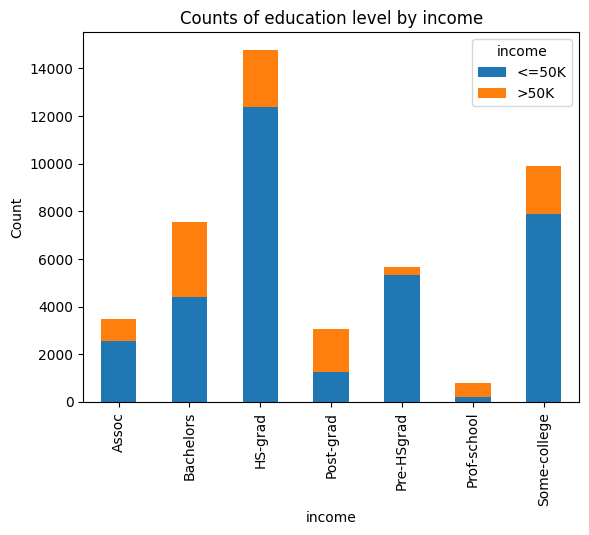

In [10]:
crosstab = pd.crosstab(data['education'], data['income'])

crosstab.plot(kind='bar', stacked=True)
plt.xlabel('income')
plt.ylabel('Count')
plt.title('Counts of education level by income')
plt.show()


In [11]:
data['workclass']. value_counts()

workclass
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: count, dtype: int64

In [12]:
workclass_counts = data['workclass'].value_counts()

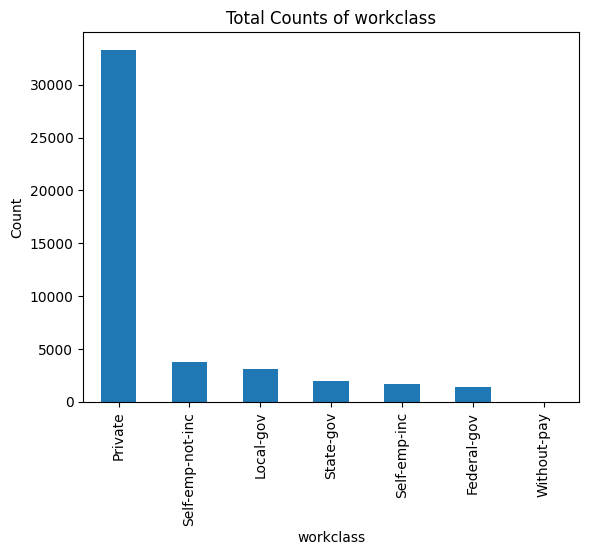

In [13]:
workclass_counts.plot(kind='bar', stacked=True)
plt.xlabel('workclass')
plt.ylabel('Count')
plt.title('Total Counts of workclass')
plt.show()

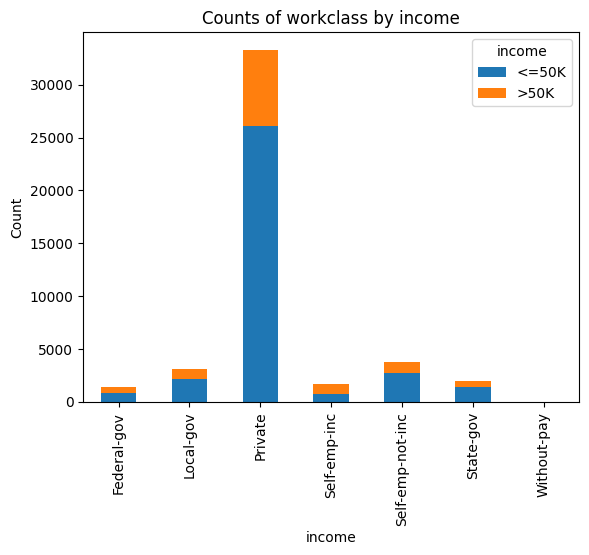

In [14]:
crosstab1 = pd.crosstab(data['workclass'], data['income'])

crosstab1.plot(kind='bar', stacked=True)
plt.xlabel('income')
plt.ylabel('Count')
plt.title('Counts of workclass by income')
plt.show()


In [15]:
data['marital-status']. value_counts()

marital-status
Married-civ-spouse       21055
Never-married            14598
Divorced                  6297
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: count, dtype: int64

In [16]:
marital_status_counts = data['marital-status'].value_counts()

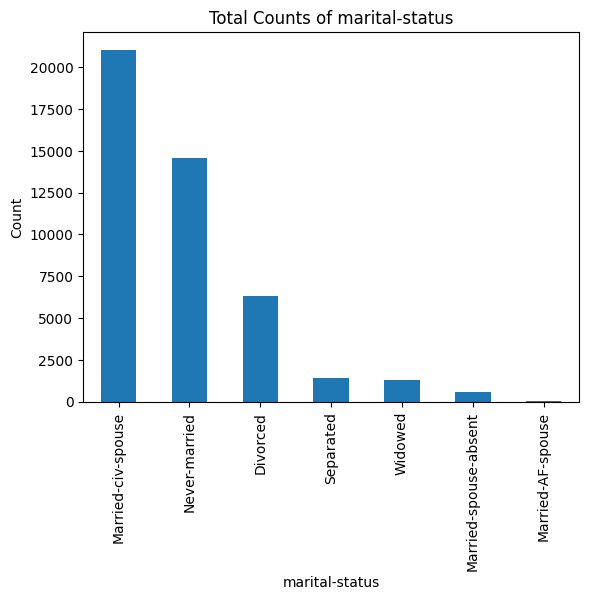

In [17]:
marital_status_counts.plot(kind='bar', stacked=True)
plt.xlabel('marital-status')
plt.ylabel('Count')
plt.title('Total Counts of marital-status')
plt.show()

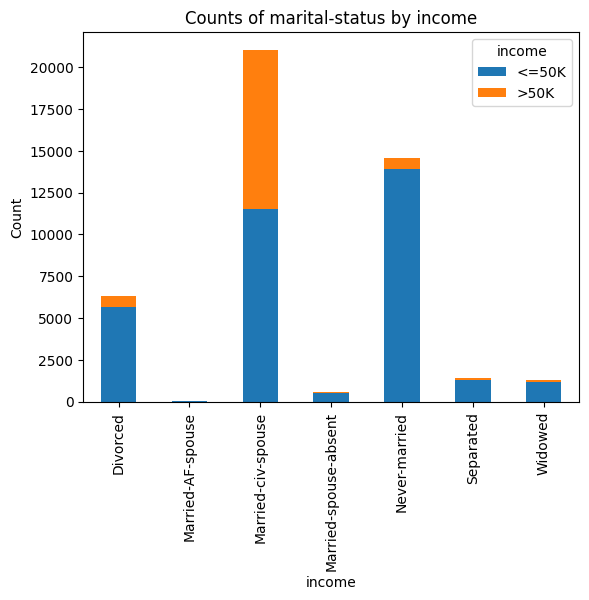

In [18]:
crosstab2 = pd.crosstab(data['marital-status'], data['income'])

crosstab2.plot(kind='bar', stacked=True)
plt.xlabel('income')
plt.ylabel('Count')
plt.title('Counts of marital-status by income')
plt.show()


In [19]:
data['occupation']. value_counts()

occupation
Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         5540
Sales                5408
Other-service        4808
Machine-op-inspct    2970
Transport-moving     2316
Handlers-cleaners    2046
Farming-fishing      1480
Tech-support         1420
Protective-serv       976
Priv-house-serv       232
Armed-Forces           14
Name: count, dtype: int64

In [20]:
marital_status_counts = data['occupation'].value_counts()

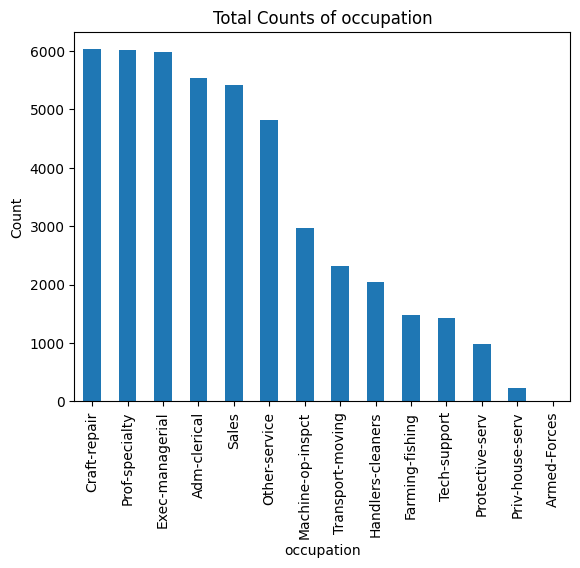

In [21]:
marital_status_counts.plot(kind='bar', stacked=True)
plt.xlabel('occupation')
plt.ylabel('Count')
plt.title('Total Counts of occupation')
plt.show()

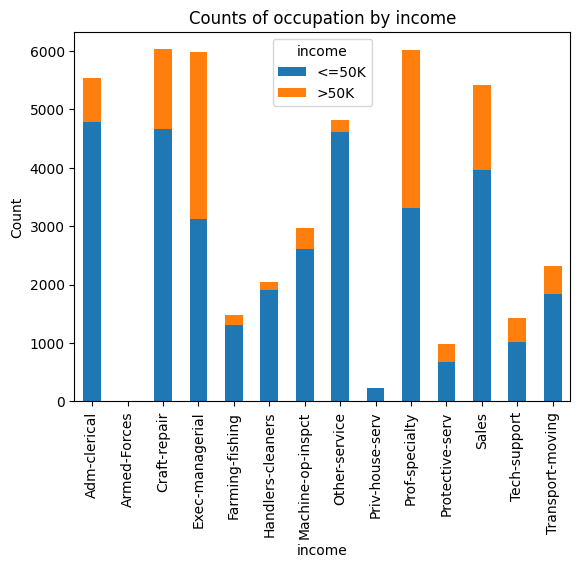

In [22]:
crosstab3 = pd.crosstab(data['occupation'], data['income'])

crosstab3.plot(kind='bar', stacked=True)
plt.xlabel('income')
plt.ylabel('Count')
plt.title('Counts of occupation by income')
plt.show()

In [23]:
data['relationship']. value_counts()

relationship
Husband           18666
Not-in-family     11702
Own-child          6626
Unmarried          4788
Wife               2091
Other-relative     1349
Name: count, dtype: int64

In [24]:
relationship_counts = data['relationship'].value_counts()

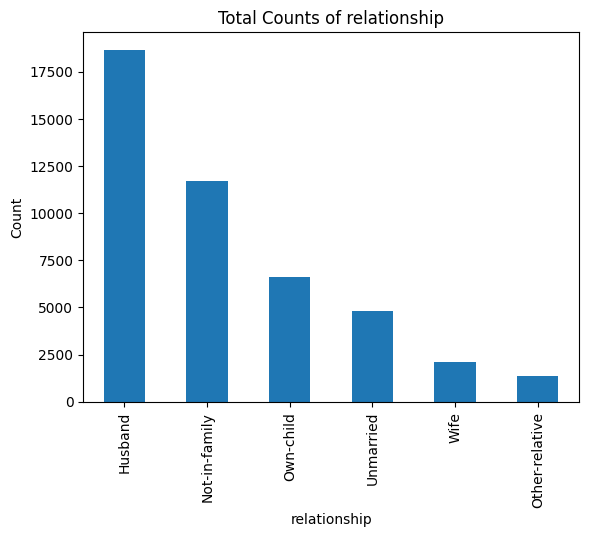

In [25]:
relationship_counts.plot(kind='bar', stacked=True)
plt.xlabel('relationship')
plt.ylabel('Count')
plt.title('Total Counts of relationship')
plt.show()

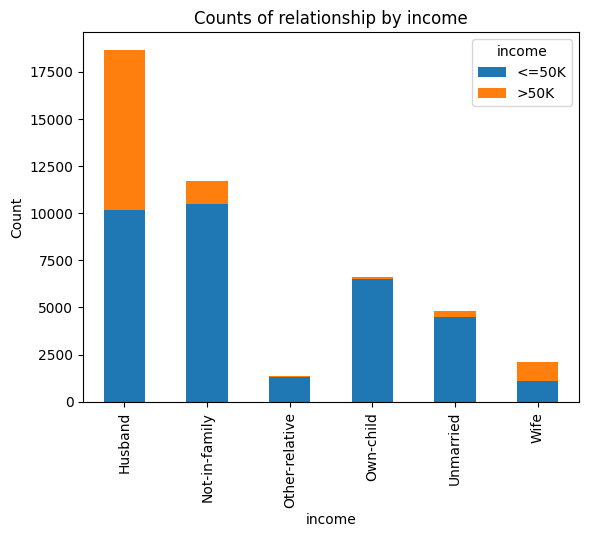

In [26]:
crosstab4 = pd.crosstab(data['relationship'], data['income'])

crosstab4.plot(kind='bar', stacked=True)
plt.xlabel('income')
plt.ylabel('Count')
plt.title('Counts of relationship by income')
plt.show()

In [27]:
data['race']. value_counts()

race
White                 38903
Black                  4228
Asian-Pac-Islander     1303
Amer-Indian-Eskimo      435
Other                   353
Name: count, dtype: int64

In [28]:
race_counts = data['race'].value_counts()

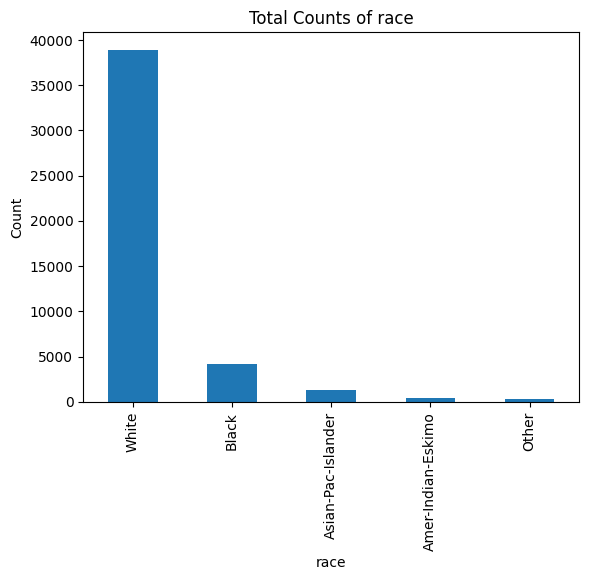

In [29]:
race_counts.plot(kind='bar', stacked=True)
plt.xlabel('race')
plt.ylabel('Count')
plt.title('Total Counts of race')
plt.show()

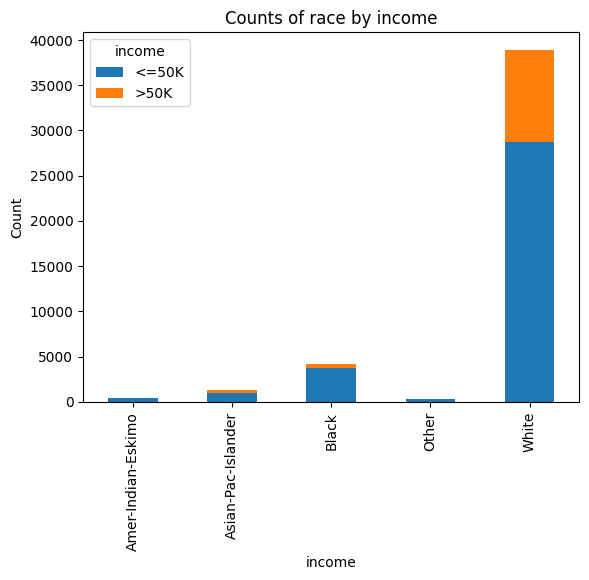

In [30]:
crosstab5 = pd.crosstab(data['race'], data['income'])

crosstab5.plot(kind='bar', stacked=True)
plt.xlabel('income')
plt.ylabel('Count')
plt.title('Counts of race by income')
plt.show()

In [31]:
data['gender']. value_counts()

gender
Male      30527
Female    14695
Name: count, dtype: int64

In [32]:
gender_counts = data['gender'].value_counts()

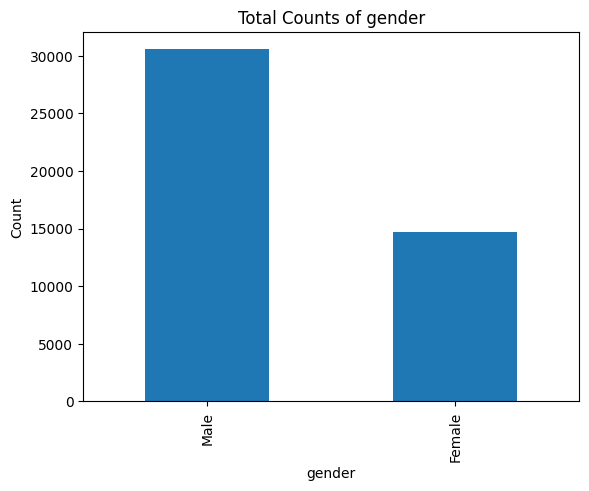

In [33]:
gender_counts.plot(kind='bar', stacked=True)
plt.xlabel('gender')
plt.ylabel('Count')
plt.title('Total Counts of gender')
plt.show()

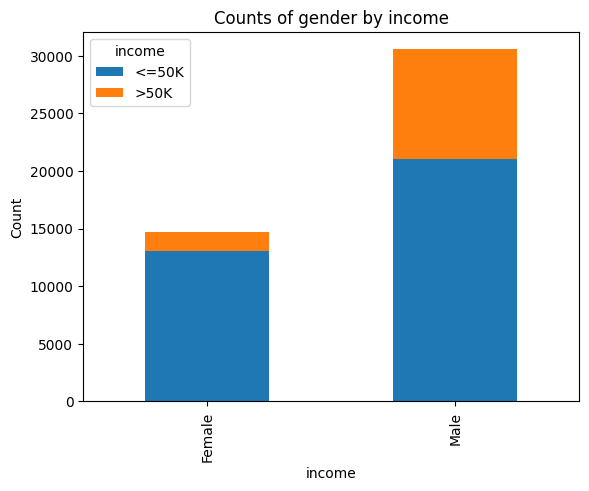

In [34]:
crosstab6 = pd.crosstab(data['gender'], data['income'])

crosstab6.plot(kind='bar', stacked=True)
plt.xlabel('income')
plt.ylabel('Count')
plt.title('Counts of gender by income')
plt.show()

In [44]:
data['native-country']. value_counts()

native-country
United-States                 41292
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador      

In [45]:
native_country = data['native-country'].value_counts()

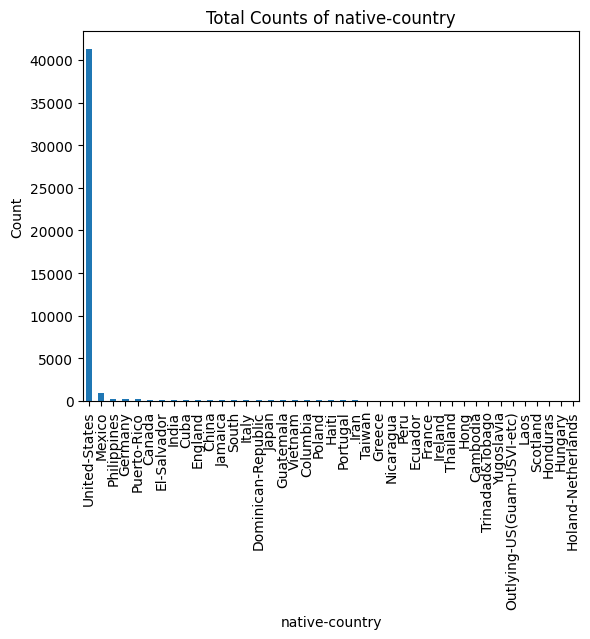

In [46]:
native_country.plot(kind='bar', stacked=True)
plt.xlabel('native-country')
plt.ylabel('Count')
plt.title('Total Counts of native-country')
plt.show()

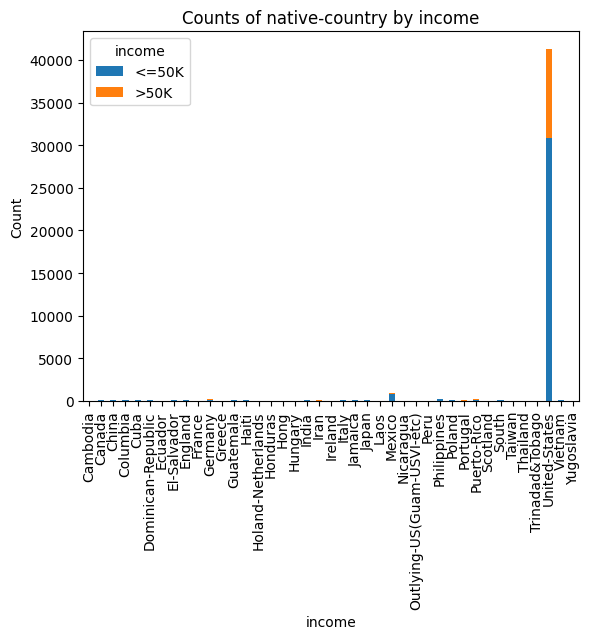

In [47]:
crosstab7 = pd.crosstab(data['native-country'], data['income'])

crosstab7.plot(kind='bar', stacked=True)
plt.xlabel('income')
plt.ylabel('Count')
plt.title('Counts of native-country by income')
plt.show()